<img align ='right' src='https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png'>

<font color = "#CC3D3D"><p>
# Data Visualization with Pandas

Pandas의 시리즈나 데이터프레임은 `plot()`이라는 시각화 메서드를 내장하고 있다. `plot()`은 matplotlib를 내부적으로 임포트하여 사용한다. 자세한 내용은 다음 Pandas 문서를 참조한다.

* https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

# 한글 폰트 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [7]:
np.random.seed(456)
df = pd.DataFrame(np.random.randn(100, 3),
                   index=pd.date_range('1/1/2018', periods=100),
                   columns=['A', 'B', 'C']).cumsum()
df

,A,B,C
2018-01-01,-0.668129,-0.498210,0.618576
2018-01-02,-0.099436,0.852300,2.248164
2018-01-03,0.202530,1.301783,1.902353
2018-01-04,-0.112701,-0.714188,0.772122
2018-01-05,-1.224547,-0.476337,0.446992
...,...,...,...
2018-04-06,-2.367582,8.079838,7.253206
2018-04-07,-2.214055,8.634839,7.729994
2018-04-08,-2.812911,9.769116,8.479133
2018-04-09,-3.904138,10.517648,9.886797


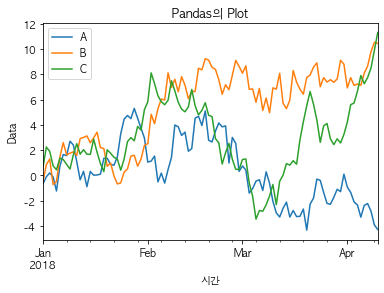

In [6]:
df.plot()

plt.title("Pandas의 Plot")
plt.xlabel("시간")
plt.ylabel("Data")
plt.show()

<font color='blue'><p>
#### `subplots` 파라미터를 `True`로 설정하여, DataFrame의 각 필드(Series)를 서로 다른 플롯(subplot)에 도식할 수 있다.

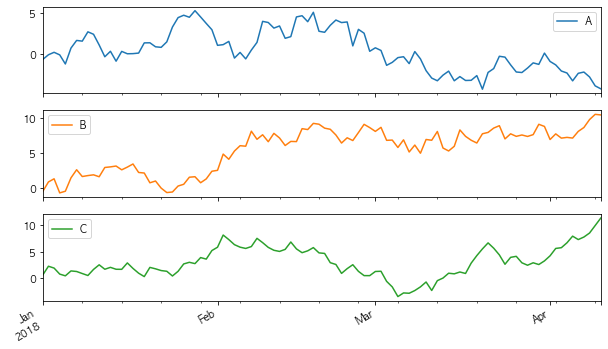

In [10]:
df.plot(subplots=True, figsize=(10, 6))
plt.show()

<font color='blue'><p>
#### `.plot.*` 메소드로 아래와 같은 여러가지 플롯을 그릴 수 있다 (DataFrame, Series 모두 가능)

* `plot.bar()`
* `plot.pie()`
* `plot.hist()`
* `plot.kde()`
* `plot.box()`
* `plot.scatter()`
* `plot.area()`


In [11]:
iris = sns.load_dataset("iris")       # 붓꽃 데이터
titanic = sns.load_dataset("titanic") # 타이타닉호 데이터

<img src="http://suruchifialoke.com/img/ML/iris.png">

In [12]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### bar chart

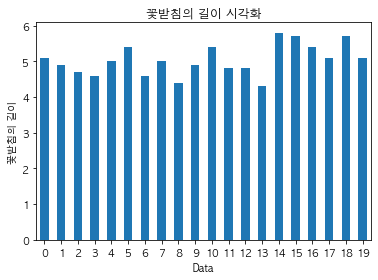

In [14]:
iris.sepal_length[:20].plot.bar(rot=0)
plt.title("꽃받침의 길이 시각화")
plt.xlabel("Data")
plt.ylabel("꽃받침의 길이")
plt.show()

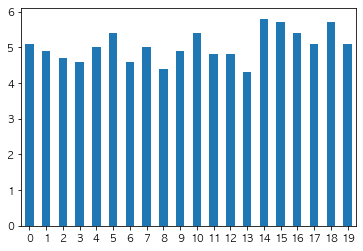

In [19]:
iris.sepal_length[:20].plot.bar(rot = 0)
plt.show()

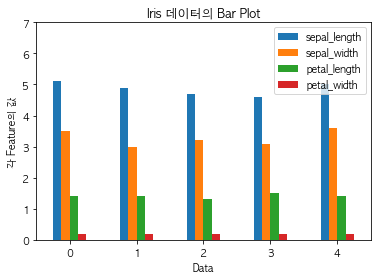

In [20]:
iris[:5].plot.bar(rot=0)
plt.title("Iris 데이터의 Bar Plot")
plt.xlabel("Data")
plt.ylabel("각 Feature의 값")
plt.ylim(0, 7)
plt.show()

가로 방향으로 바 차트를 그리려면 `plot.barh()`를 사용한다. 

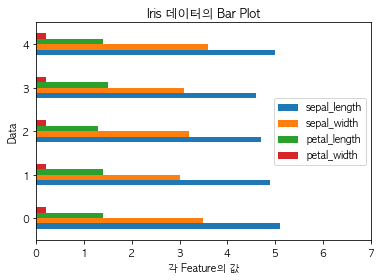

In [27]:
iris[:5].plot.barh(rot = 0)
plt.title("Iris 데이터의 Bar Plot")
plt.ylabel("Data")
plt.xlabel("각 Feature의 값")
plt.xlim(0, 7)
plt.show()

`stacked` 파라미터를 `True`로 설정하면, 누적막대그래프를 그릴 수 있다.

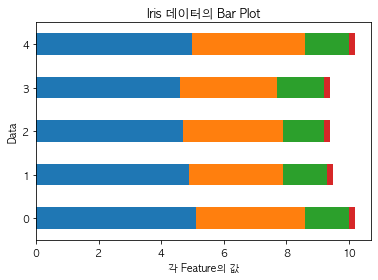

In [25]:
iris[:5].plot.barh(stacked=True, legend=False)
plt.title("Iris 데이터의 Bar Plot")
plt.ylabel("Data")
plt.xlabel("각 Feature의 값")
plt.show()

그룹 분석 결과도 데이터프레임이므로 같은 방식으로 시각화할 수 있다.

In [11]:
df = iris.groupby(iris.species).mean()
df

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


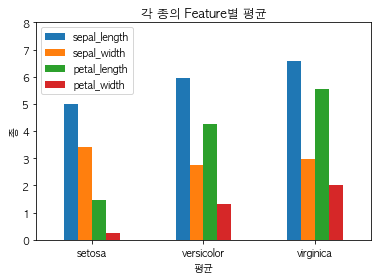

In [12]:
df.plot.bar(rot=0)
plt.title("각 종의 Feature별 평균")
plt.xlabel("평균")
plt.ylabel("종")
plt.ylim(0, 8)
plt.show()

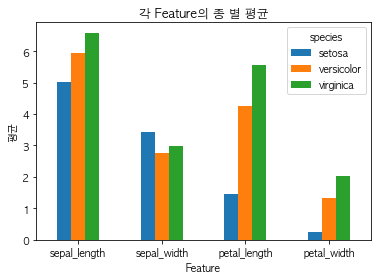

In [13]:
df.T.plot.bar(rot=0)
plt.title("각 Feature의 종 별 평균")
plt.xlabel("Feature")
plt.ylabel("평균")
plt.show()

#### pie chart

In [29]:
df = titanic.pclass.value_counts()
df

3    491
1    216
2    184
Name: pclass, dtype: int64

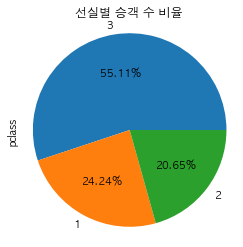

In [35]:
df.plot.pie(autopct='%.2f%%')
plt.title("선실별 승객 수 비율")
plt.axis('scaled')
plt.show()

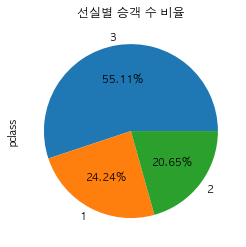

In [33]:
df.plot.pie(autopct='%.2f%%')
plt.title("선실별 승객 수 비율")
#plt.axis('equal')
plt.show()

#### histogram

In [37]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [42]:
titanic.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

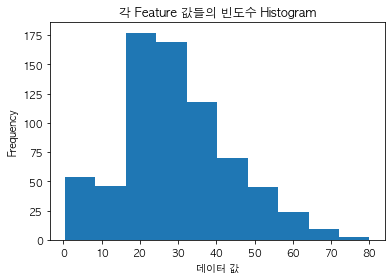

In [43]:
titanic.age.plot.hist()
plt.title("각 Feature 값들의 빈도수 Histogram")
plt.xlabel("데이터 값")
plt.show()

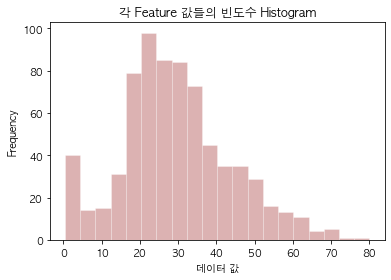

In [58]:
titanic.age.plot.hist(bins=20, alpha=0.3, edgecolor='w', color='darkred')
plt.title("각 Feature 값들의 빈도수 Histogram")
plt.xlabel("데이터 값")
plt.show()

#### probability density function (PDF)

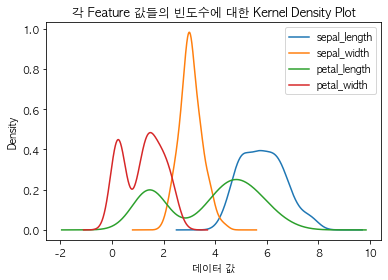

In [18]:
iris.plot.kde()
#iris.plot.density()
plt.title("각 Feature 값들의 빈도수에 대한 Kernel Density Plot")
plt.xlabel("데이터 값")
plt.show()

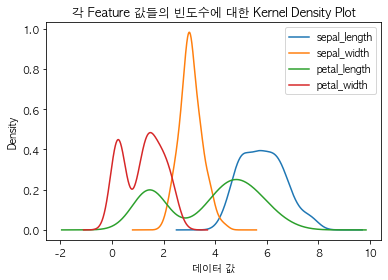

In [59]:
iris.plot.density()
plt.title("각 Feature 값들의 빈도수에 대한 Kernel Density Plot")
plt.xlabel("데이터 값")
plt.show()

#### box plot

<img align="left" src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile30.uf.tistory.com%2Fimage%2F99EB75395D759A192ACC70" style='width: 70%; height: auto;'>

In [61]:
3**6

729

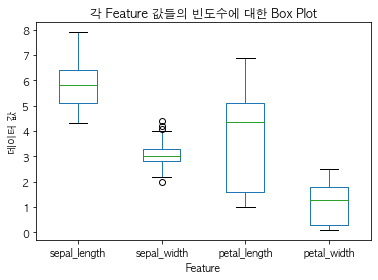

In [19]:
iris.plot.box()
plt.title("각 Feature 값들의 빈도수에 대한 Box Plot")
plt.xlabel("Feature")
plt.ylabel("데이터 값")
plt.show()

박스플롯에 대해서는 추가적인 기능을 가진 `boxplot` 명령이 별도로 있다.

* `boxplot`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html

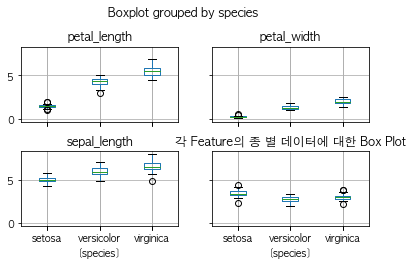

In [20]:
iris.boxplot(by='species')
plt.tight_layout(pad=3, h_pad=1) # tight_layout() adjusts spacing between subplots to minimize the overlaps
plt.title("각 Feature의 종 별 데이터에 대한 Box Plot")
plt.show()

#### scatter plot

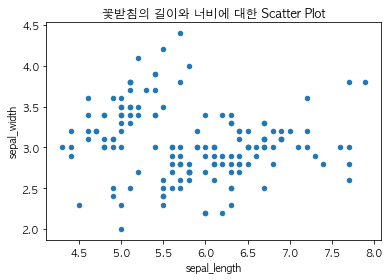

In [21]:
iris.plot.scatter(x='sepal_length', y='sepal_width')
plt.title("꽃받침의 길이와 너비에 대한 Scatter Plot")
plt.show()

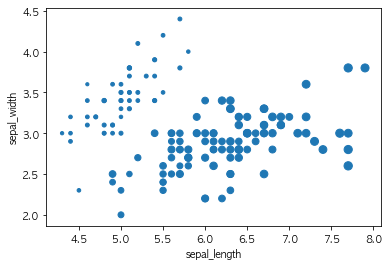

In [22]:
# 값에 따라 점 크기 다르게
iris.plot.scatter(x='sepal_length', y='sepal_width', s=iris.petal_length*10)
plt.show()

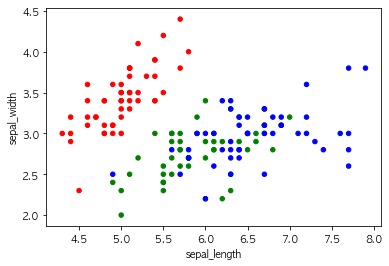

In [23]:
# 값에 따라 점 색깔을 다르게
color = np.where(iris.species == 'setosa', 'r', np.where(iris.species == 'versicolor', 'g', 'b'))

iris.plot.scatter(x='sepal_length', y='sepal_width', c=color)
plt.show()

<font color = "#CC3D3D"><p>
# End